In [138]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/supermarket-sales/supermarket_sales - Sheet1.csv


In [139]:
df=pd.read_csv("../input/supermarket-sales/supermarket_sales - Sheet1.csv",parse_dates=['Date'])
df.head()
#import dataset

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [140]:
import matplotlib.pyplot as plt
import seaborn as sns

In [141]:
#changing the date format
df['Date']=pd.to_datetime(df.Date)
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [142]:
#extracting the date in the dataset
def extract_date(df,column):
    df[column+"_year"]=df[column].apply(lambda x:x.year)
    df[column+"_month"]=df[column].apply(lambda x:x.month)
extract_date(df,'Date')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Date_year,Date_month
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,2019,1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,2019,3
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,2019,3
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,2019,1
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2019,2


In [143]:
df['Date_month']= df[['Date_month']].astype("str")
df['Date_month'].replace({"1":"Jan","2":"Feb","3":"Mar"},inplace=True)
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Date_year,Date_month
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,2019,Jan
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,2019,Mar
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,2019,Mar
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,2019,Jan
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2019,Feb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,13:46,Ewallet,40.35,4.761905,2.0175,6.2,2019,Jan
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,17:16,Ewallet,973.80,4.761905,48.6900,4.4,2019,Mar
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22,Cash,31.84,4.761905,1.5920,7.7,2019,Feb
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,15:33,Cash,65.82,4.761905,3.2910,4.1,2019,Feb


In [144]:
del df['Invoice ID']
del df['Time']
del df['gross margin percentage']
del df['Branch']
df.head(10)
#deleting unwanted columns as part of data cleaning

,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment,cogs,gross income,Rating,Date_year,Date_month
0,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,Ewallet,522.83,26.1415,9.1,2019,Jan
1,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,Cash,76.40,3.8200,9.6,2019,Mar
2,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,Credit card,324.31,16.2155,7.4,2019,Mar
3,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,Ewallet,465.76,23.2880,8.4,2019,Jan
4,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,Ewallet,604.17,30.2085,5.3,2019,Feb
5,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,2019-03-25,Ewallet,597.73,29.8865,4.1,2019,Mar
6,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2019-02-25,Ewallet,413.04,20.6520,5.8,2019,Feb
7,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2019-02-24,Ewallet,735.60,36.7800,8.0,2019,Feb
8,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,2019-01-10,Credit card,72.52,3.6260,7.2,2019,Jan
9,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2019-02-20,Credit card,164.52,8.2260,5.9,2019,Feb


In [145]:
df.isnull().sum()

City             0
Customer type    0
Gender           0
Product line     0
Unit price       0
Quantity         0
Tax 5%           0
Total            0
Date             0
Payment          0
cogs             0
gross income     0
Rating           0
Date_year        0
Date_month       0
dtype: int64

There are no missing values in the dataset

In [146]:
df.dtypes
#checking the data types of each of the columns

City                     object
Customer type            object
Gender                   object
Product line             object
Unit price              float64
Quantity                  int64
Tax 5%                  float64
Total                   float64
Date             datetime64[ns]
Payment                  object
cogs                    float64
gross income            float64
Rating                  float64
Date_year                 int64
Date_month               object
dtype: object

# Data Analysis

Text(0.5, 1.0, 'Heatmap for Correlation between Sales Metrics')

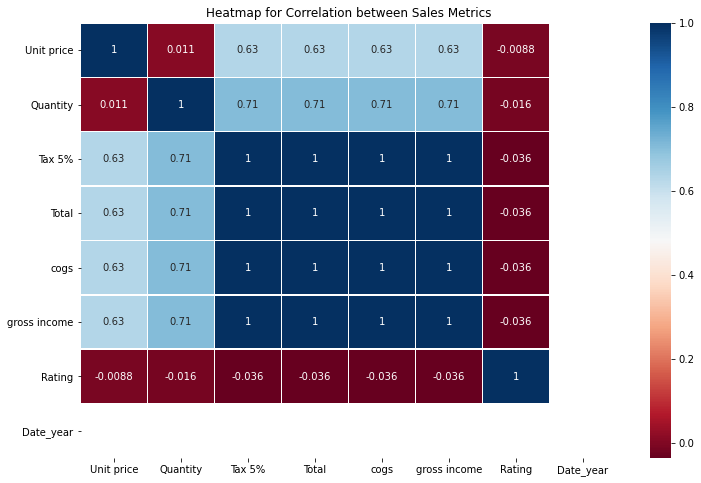

In [147]:
#Heatmap for Correlation between Sales Metrics
plt.figure(figsize=(12,8))
df_heatmap= sns.heatmap(df.corr(),annot=True,
                        linewidths=.5,cmap='RdBu')
plt.title('Heatmap for Correlation between Sales Metrics')

In [148]:
#analysing best performing city branch based on maximum revenue generated
df_test=df[['City','Total']]
df_grp=df_test.groupby(['City'],as_index=False).sum()
df_grp

,City,Total
0,Mandalay,106197.6720
1,Naypyitaw,110568.7065
2,Yangon,106200.3705


**Analysis**

Based on the sum of the 3 branches of the supermarket, Naypyitaw is generating the most sales revenue, followed by Yangon with Mandalay with almost similar revenue.  

In [149]:
#analysing best performing city branch based on gross income generated
df_pro=df[['City','gross income']]
df_grp1=df_pro.groupby(['City'],as_index=False).sum()
df_grp1

,City,gross income
0,Mandalay,5057.0320
1,Naypyitaw,5265.1765
2,Yangon,5057.1605


**Analysis**

Based on the total income generated of the three supermarket, Naypyitaw has generated the maximum profit followed by Mandalay and Yangon with similar incomes.

In [150]:
#analysing the sales revenue for each product line
df_sal=df[['Product line','Total']]
df_sal_grp= df_sal.groupby('Product line', as_index=False).sum()
df_sal_grp

,Product line,Total
0,Electronic accessories,54337.5315
1,Fashion accessories,54305.8950
2,Food and beverages,56144.8440
3,Health and beauty,49193.7390
4,Home and lifestyle,53861.9130
5,Sports and travel,55122.8265


Text(0, 0.5, 'Product Line')

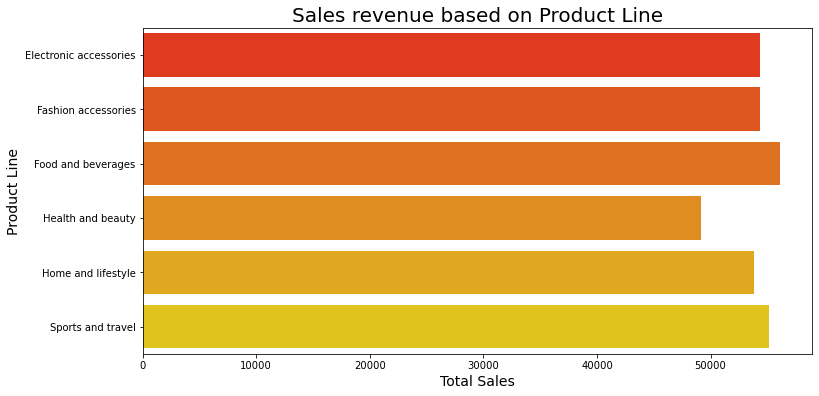

In [151]:
#visualising sales revenue for each product line
plt.figure(figsize=(12,6))
sns.barplot(x='Total',y='Product line',data=df_sal_grp,palette='autumn')
plt.title('Sales revenue based on Product Line',fontsize=20)
plt.xlabel('Total Sales',fontsize=14)
plt.ylabel('Product Line',fontsize=14)

Analysis****

Based on the above representation we can see that Food and Beverages as brought in the most sales revenue and Health and Beauty products have brought in the least revenue.

Text(0, 0.5, 'Count')

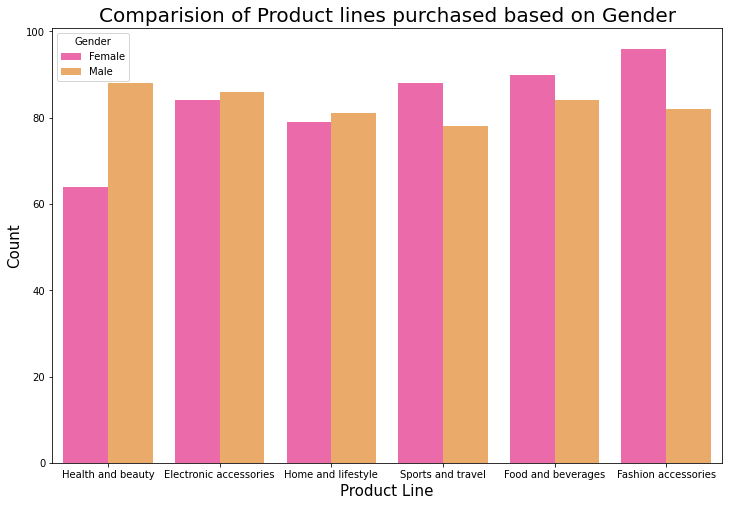

In [152]:
#Comparision of Product lines purchased based on Gender
plt.figure(figsize=(12,8))
sns.countplot(x='Product line', hue='Gender',data= df, 
              palette='spring')
plt.title('Comparision of Product lines purchased based on Gender',fontsize=20)
plt.xlabel('Product Line',fontsize=15)
plt.ylabel('Count',fontsize=15)

**Analysis**

Based on the representation of the bar graph above, it can be inferred that over the 3 branch locations of the supermarket there are 6 categories of products being sold with categories such as 'Health and Beauty', 'Electronic accessories' and 'Home and Lifestyle' products are more popular categories among men. Whereas, 'Sports and Travel', 'Food and Beverage', 'Fashion Accessories' products are more popular categories among women.

'Health and Beauty' products is the most preferred category of products for Men. Whereas, 'Fashion Accessories' are the most in demand by women as compared to other categories.

In [153]:
#analysing if the sales revenue generated is more through members or normal customers
df_cust=df[['Customer type','Total']]
df_grp_cust=df_cust.groupby('Customer type',as_index=False).sum()
df_grp_cust

,Customer type,Total
0,Member,164223.444
1,Normal,158743.305


In [154]:
#analysing the average spend of members vs normal customers
df_grp_cust_avg=df_cust.groupby('Customer type',as_index=False).mean()
df_grp_cust_avg

,Customer type,Total
0,Member,327.791305
1,Normal,318.122856


**Analysis**

From the above analysis it can be concluded that the 'Member customers' of the supermarket bring in more revenue than the normal customers. However the difference isn't very significant between the two. 

Similarly, Member Customers have an average spending of (327.79) higher than the average spending of a Normal customer(318.12)

In [155]:
#analysing the most profitable product line in each of the city branches
df_prof_prod=df[['City','Product line','gross income']]
df_grp_prof_prod= df_prof_prod.groupby(['City','Product line'], as_index=False).sum()
df_grp_prof_prod_piv= df_grp_prof_prod.pivot(index='City',columns='Product line')
df_grp_prof_prod_piv


gross income                                         \
Product line Electronic accessories Fashion accessories Food and beverages   
City                                                                         
Mandalay                   811.9735            781.5865           724.5185   
Naypyitaw                  903.2845           1026.6700          1131.7550   
Yangon                     872.2435            777.7385           817.2905   

                                                                     
Product line Health and beauty Home and lifestyle Sports and travel  
City                                                                 
Mandalay               951.460           835.6745          951.8190  
Naypyitaw              791.206           661.6930          750.5680  
Yangon                 599.893          1067.4855          922.5095

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

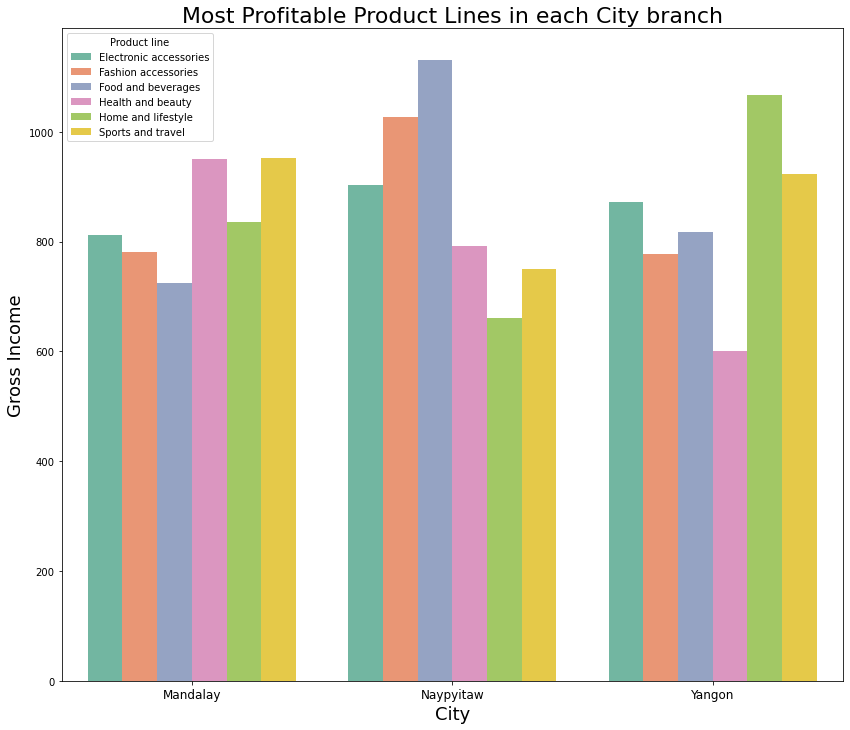

In [156]:
#visualzing the most profitable product line in each of the city branches
plt.figure(figsize=(14,12))
sns.barplot(x='City',y='gross income',hue='Product line',
           data= df_grp_prof_prod, palette='Set2')
plt.title('Most Profitable Product Lines in each City branch',fontsize=22)
plt.xlabel('City',fontsize=18)
plt.ylabel('Gross Income',fontsize=18)
plt.xticks(fontsize=12)

*Branch Analysis*****
* **Mandalay Branch**- 'Health and Beauty' and 'Sports and Travel' are the highest profit making product lines. Least being 'Food and Beverage'
* **Naypyitaw Branch**- 'Food and Beverage' generate the most profit of all the lines sold, followed by 'Fashion Accessories'. Least being 'Home and Lifestyle'
* **Yangon Branch**- 'Home and Lifestyle'generates the maximum profit followed by 'Sports and Travel'. Least being 'Health and Beauty'

*Product Line Analysis*****
* Electronic Accessories are most successful in Naypyitaw Branch and least in Mandalay Branch
* Fashion Accessories are most successful in Naypyitaw Branch and least in Yangon Branch
* Food and Beverages are most successful in Naypyitaw Branch and least in Mandalay Branch
* Health and Beauty are most successful in Mandalay Branch and least in Yangon Branch
* Home and Lifestyle are most successful in Yangon Branch and least in Naypyitaw Branch
* Sports and Travel are most successful in Mandalay Branch and least in Naypyitaw Branch

In [157]:
#average rating of each city branch based on their product line
df_rating= df[['City','Product line','Rating']]
df_rating_city=df_rating.groupby(['City','Product line'], as_index=False).mean()
df_rating_city_piv=df_rating_city.pivot(index='City',columns='Product line')
df_rating_city_piv

Rating                                         \
Product line Electronic accessories Fashion accessories Food and beverages   
City                                                                         
Mandalay                   7.116364            6.722581           6.994000   
Naypyitaw                  6.747273            7.440000           7.080303   
Yangon                     6.911667            6.878431           7.253448   

                                                                     
Product line Health and beauty Home and lifestyle Sports and travel  
City                                                                 
Mandalay              7.100000           6.516000          6.509677  
Naypyitaw             6.998077           7.060000          7.028889  
Yangon                6.900000           6.930769          7.257627

Text(0, 0.5, 'City')

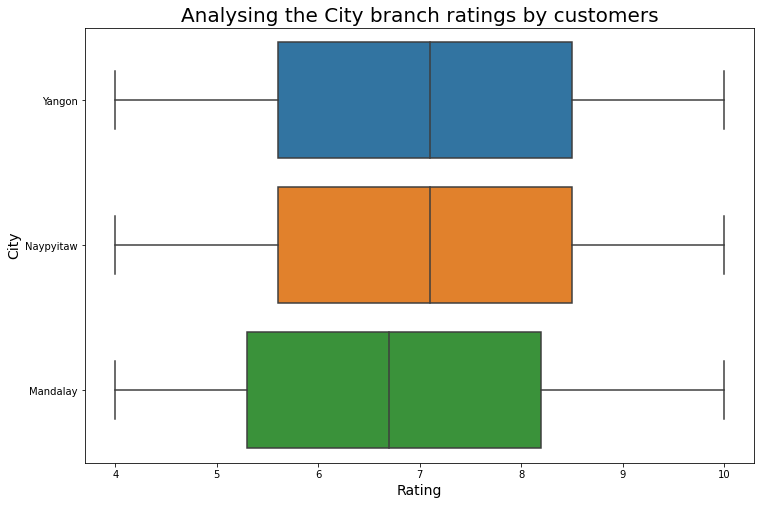

In [158]:
#visualising the best city branch based on their overall ratings
plt.figure(figsize=(12,8))
sns.boxplot(x='Rating',y='City',data= df)
plt.title('Analysing the City branch ratings by customers', fontsize=20)
plt.xlabel('Rating',fontsize=14)
plt.ylabel('City',fontsize=14)

**Analysis**

The average rating of Naypyitaw is the highest amongst the three branches with Mandalay having the least average rating.
The minimum rating that any branch gets is about 4.0 with the highest being 10.0.

Analysing the performance based on customer ratings of all branches, Yangon and Naypyitaw seem to be doing the best with very similar rating range.

Text(0, 0.5, 'Rating')

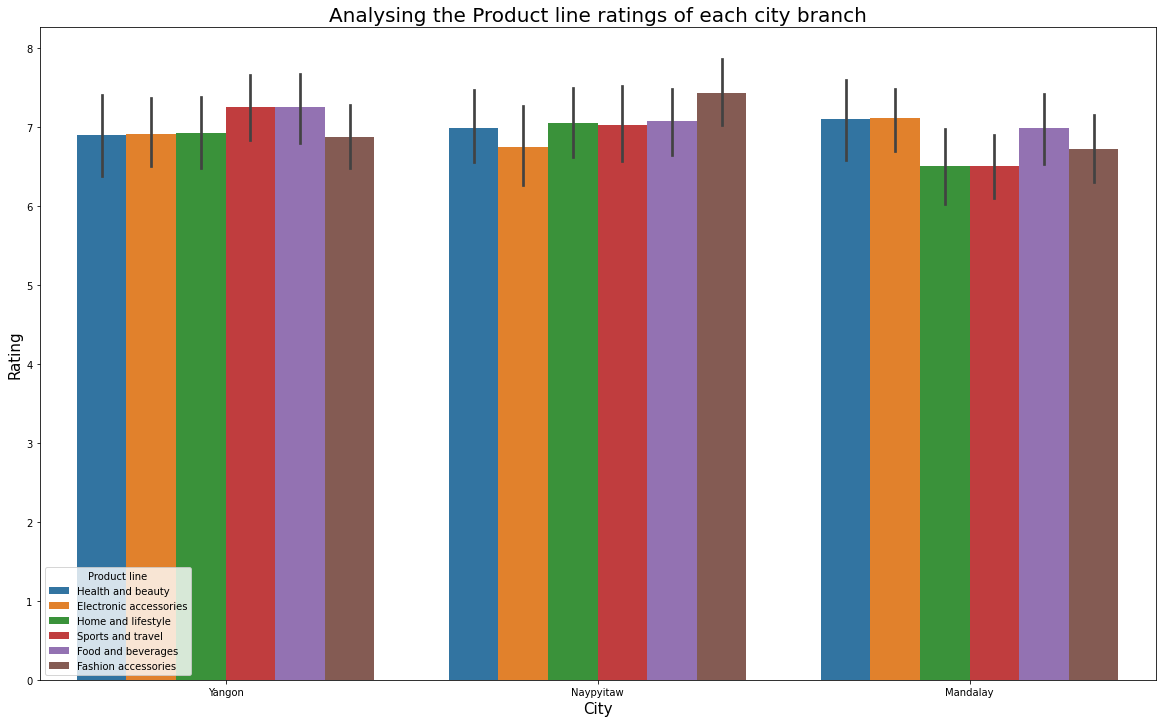

In [159]:
#visualising the product line with the best rating per city branch
plt.figure(figsize=(20,12))
sns.barplot(x='City',y='Rating',hue='Product line',data= df)
plt.title('Analysing the Product line ratings of each city branch', fontsize=20)
plt.xlabel('City',fontsize=15)
plt.ylabel('Rating',fontsize=15)

Analysis****

* Mandalay Branch- 'Health and Beauty' and 'Electronic accessories' are the highest rated product lines in Mandalay with Sports and Travel least rated.
* Naypyitaw Branch- 'Fashion Accessories' have the highest rating at Naypyitaw Branch with 'Electronic accessories' least rated.
* Yangon Branch- 'Sports and Travel' and 'Food and Beverages' are the highest rated product lines at Yangon with 'Fashion accessories' being the least rated.

In [160]:
df.head()

,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment,cogs,gross income,Rating,Date_year,Date_month
0,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,Ewallet,522.83,26.1415,9.1,2019,Jan
1,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,Cash,76.40,3.8200,9.6,2019,Mar
2,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,Credit card,324.31,16.2155,7.4,2019,Mar
3,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,Ewallet,465.76,23.2880,8.4,2019,Jan
4,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,Ewallet,604.17,30.2085,5.3,2019,Feb


In [181]:
#analysing quantity of products sold every month
df_mon=df[['Product line','Date_month','Quantity']]
df_mon_grp= df_mon.groupby(['Product line','Date_month'],as_index=False).sum()
df_mon_piv= df_mon_grp.pivot(index='Product line',columns='Date_month')
df_mon_piv

Quantity          
Date_month                  Feb  Jan  Mar
Product line                             
Electronic accessories      313  333  325
Fashion accessories         295  336  271
Food and beverages          349  325  278
Health and beauty           266  254  334
Home and lifestyle          205  342  364
Sports and travel           226  375  319

([0, 1, 2, 3, 4, 5], <a list of 6 Text major ticklabel objects>)

<Figure size 864x576 with 0 Axes>

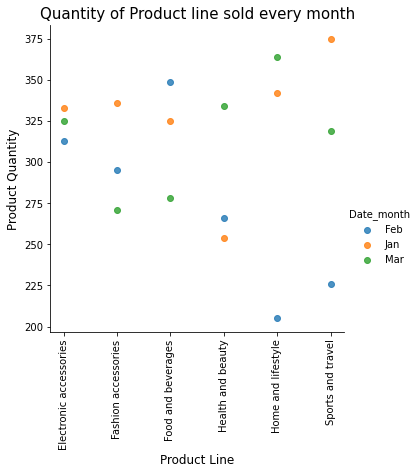

In [178]:
#visualizing the monthly product quantity sold
plt.figure(figsize=(12,8))
sns.lmplot(x='Product line',y='Quantity',hue='Date_month',fit_reg=False, 
           data=df_mon_grp)
plt.title('Quantity of Product line sold every month',fontsize=15)
plt.xlabel('Product Line',fontsize=12)
plt.ylabel('Product Quantity',fontsize=12)
plt.xticks(rotation=90)

**Analysis**

As per the above analysis:
* January: 'Sports and Travel' items sold the most while, 'Health and Beauty' sold the least number of items.
* February: 'Food and Beverage' items sold the most while, 'Home and Lifestyle' sold the least number of items.
* March: 'Home and Lifestyle' items sold the most while,'Fashion accessories' sold the least number of items.